In [29]:
import pandas as pd
import numpy as np
from dask import dataframe as dd
from dask.distributed import Client
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.decomposition import PCA
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
def readCSV_Function(file_path):
    dask_df = dd.read_csv(file_path, blocksize=1e6)
    dask_df = dask_df.repartition(npartitions=8)
    return dask_df.compute(scheduler='threads')

filePath = "F:\\Thesis_ddos\\Concatenated_Data_Before_Feature_Engineering\\Cleaned_Data.csv"
df = readCSV_Function(filePath)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df = shuffle(df)

In [3]:
df.nunique()

Protocol                         3
Flow Duration               143257
Total Fwd Packets              365
Total Backward Packets         140
Fwd Packets Length Total      2625
                             ...  
Idle Mean                    65588
Idle Std                     52351
Idle Max                     65560
Idle Min                     65445
Label                           13
Length: 78, dtype: int64

#### Dropping categorical columns that have one category predominance

In [4]:
unique_value_columns = [col for col in df.columns if df[col].nunique() == 1]
unique_value_columns

['Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'FIN Flag Count',
 'PSH Flag Count',
 'ECE Flag Count',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

#### Performing drop operation & saving that in new csv

In [5]:
df.drop(columns=unique_value_columns, inplace=True)
df.shape

(409000, 66)

def dataCleaningResultToAnotherCSV(dataFrameArg, dirPath, file_name):
    dataFrameArg.to_csv(dirPath + file_name)

newCsvPath = "D:\\Thesis_Group_of_Brig_Gen_Razzak_Sir\\After_Column_Data_Cleaning\\"
csvFileName = "after_dropping_unique_data_containing_features.csv"
dataCleaningResultToAnotherCSV(dataFrameArg=df, dirPath=newCsvPath, file_name=csvFileName)

#### As we visualized the heatmap of the remaining 66 features, now need to find out the co-relation pairs
#### But Before that, need to apply encoding of categorical data, such as "Label" feature

In [6]:
le = preprocessing.LabelEncoder()
before_encoding_dataframe = df.copy(deep=True)
before_encoding_dataframe.head(5) # see the Label feature

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
122,6,11632617,4,0,0.0,0.0,0.0,0.0,0.0,0.000000,...,20,48.0,0.0,48.0,48.0,11632568.0,0.0,11632568.0,11632568.0,UDP-lag
737,17,215336,6,0,2088.0,0.0,393.0,321.0,348.0,35.088459,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_UDP
469,6,34858743,6,0,0.0,0.0,0.0,0.0,0.0,0.000000,...,20,1.0,0.0,1.0,1.0,17429370.0,4673100.5,20733752.0,14124989.0,UDP-lag
1476,17,4,4,0,5888.0,0.0,1472.0,1472.0,1472.0,0.000000,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_LDAP
597,17,107782,4,0,1438.0,0.0,389.0,330.0,359.5,34.063667,...,321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_UDP


In [7]:
df["Label"] = le.fit_transform(df["Label"])
df["Label"] = pd.to_numeric(df['Label'], downcast='integer')
df.head(5) # see the Label feature

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
122,6,11632617,4,0,0.0,0.0,0.0,0.0,0.0,0.000000,...,20,48.0,0.0,48.0,48.0,11632568.0,0.0,11632568.0,11632568.0,11
737,17,215336,6,0,2088.0,0.0,393.0,321.0,348.0,35.088459,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
469,6,34858743,6,0,0.0,0.0,0.0,0.0,0.0,0.000000,...,20,1.0,0.0,1.0,1.0,17429370.0,4673100.5,20733752.0,14124989.0,11
1476,17,4,4,0,5888.0,0.0,1472.0,1472.0,1472.0,0.000000,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
597,17,107782,4,0,1438.0,0.0,389.0,330.0,359.5,34.063667,...,321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8


<center><h3 style="background:#FF00FF;color:black">
Encoding of "Label" visualization
</h3></center>

In [8]:
Label_keys = list(before_encoding_dataframe.Label)
Label_values = list(df.Label)
# Label_tuples = list(zip(Label_keys,Label_values)) # # creating tuples from above two lists
# Label_visualize_df = pd.DataFrame(Label_tuples, columns=['Label','Encoding'])
Label_dict = dict(Label = Label_keys,Encoding = Label_values)
Label_visualize_df = pd.DataFrame.from_dict(Label_dict)
Label_visualize_df.drop_duplicates(inplace=True)
Label_visualize_df.reset_index(inplace=True, drop=True)
Label_visualize_df

,Label,Encoding
0,UDP-lag,11
1,DrDoS_UDP,8
2,DrDoS_LDAP,2
3,DrDoS_SSDP,7
4,DrDoS_NTP,4
5,DrDoS_MSSQL,3
6,DrDoS_NetBIOS,5
7,DrDoS_DNS,1
8,BENIGN,0
9,Syn,9


<center><h4 style="background:#ADFF2F;color:black">
Saving the after encoding dataframe into new csv
</h4></center>

In [9]:
# dirPath = "D:\\Thesis_Group_of_Brig_Gen_Razzak_Sir\\After_Column_Data_Cleaning\\"
# csvFileName = "After_Label_Encoding.csv"
# encodingFileName = "Label_Encoding.csv"
#
# Label_visualize_df.to_csv(dirPath+encodingFileName)
# df.to_csv(dirPath + csvFileName)
# df.info(memory_usage="deep")

<center><h3 style="background:orange;color:black">
Hypothesis Testing
</h3></center>

##### Null Hypothesis(H0): There exists no co-relation between two features
##### Alternative Hypothesis (H1): opposite of null hypothesis

<center><h3 style="background:yellow;color:black">
Chi-Squared Test
</h3></center>

In [10]:
from scipy.stats import chi2_contingency
def chi_squared_test(feature1,feature2):
    stat ,p, dof, expected = chi2_contingency(pd.crosstab(feature1,feature2))
    alpha = 0.05
    if p > alpha:
        return f"They are independent & P-value: {p}"
    else:
        return f"Co-related & P-value: {p}"

In [11]:
present_columns = sorted(df)
present_columns

['ACK Flag Count',
 'Active Max',
 'Active Mean',
 'Active Min',
 'Active Std',
 'Avg Bwd Segment Size',
 'Avg Fwd Segment Size',
 'Avg Packet Size',
 'Bwd Header Length',
 'Bwd IAT Max',
 'Bwd IAT Mean',
 'Bwd IAT Min',
 'Bwd IAT Std',
 'Bwd IAT Total',
 'Bwd Packet Length Max',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Min',
 'Bwd Packet Length Std',
 'Bwd Packets Length Total',
 'Bwd Packets/s',
 'CWE Flag Count',
 'Down/Up Ratio',
 'Flow Bytes/s',
 'Flow Duration',
 'Flow IAT Max',
 'Flow IAT Mean',
 'Flow IAT Min',
 'Flow IAT Std',
 'Flow Packets/s',
 'Fwd Act Data Packets',
 'Fwd Header Length',
 'Fwd IAT Max',
 'Fwd IAT Mean',
 'Fwd IAT Min',
 'Fwd IAT Std',
 'Fwd IAT Total',
 'Fwd PSH Flags',
 'Fwd Packet Length Max',
 'Fwd Packet Length Mean',
 'Fwd Packet Length Min',
 'Fwd Packet Length Std',
 'Fwd Packets Length Total',
 'Fwd Packets/s',
 'Fwd Seg Size Min',
 'Idle Max',
 'Idle Mean',
 'Idle Min',
 'Idle Std',
 'Init Bwd Win Bytes',
 'Init Fwd Win Bytes',
 'Label',
 'P

##### Relation between Syn Flag count vs Protocol

In [12]:
pd.crosstab(df['SYN Flag Count'],df['Protocol'])

Protocol,0,6,17
SYN Flag Count,,,
0,344,76009,332533
1,0,114,0


In [13]:
chi_squared_test(df['SYN Flag Count'],df['Protocol'])

'Co-related & P-value: 5.24843500768918e-109'

##### Relation between RST Flag count vs Protocol

In [14]:
pd.crosstab(df['RST Flag Count'],df['Protocol'])

Protocol,0,6,17
RST Flag Count,,,
0,344,75097,332533
1,0,1026,0


In [15]:
chi_squared_test(df['RST Flag Count'],df['Protocol'])

'Co-related & P-value: 0.0'

##### Relation between CWE Flag count vs Protocol

In [16]:
pd.crosstab(df['CWE Flag Count'],df['Protocol'])

Protocol,0,6,17
CWE Flag Count,,,
0,344,73778,332533
1,0,2345,0


In [17]:
chi_squared_test(df['CWE Flag Count'],df['Protocol'])

'Co-related & P-value: 0.0'

##### Relation between URG Flag count vs Protocol

In [18]:
pd.crosstab(df['URG Flag Count'],df['Protocol'])

Protocol,0,6,17
URG Flag Count,,,
0,344,71593,332533
1,0,4530,0


In [19]:
chi_squared_test(df['URG Flag Count'],df['Protocol'])

'Co-related & P-value: 0.0'

<center><h3 style="background:yellow;color:black">
T Test
</h3></center>

In [20]:
from scipy.stats import ttest_ind
def t_value_test(feature1,feature2):
    score = ttest_ind(feature1,feature2,equal_var=False)[1]
    if score > 0.05:
        return f"Co-related & T-score: {score}"
    return f"They are independent & T-score: {score}"

##### Relation between Flow Duration vs FWD IAT Total

In [21]:
t_value_test(df['Flow Duration'],df['Fwd IAT Total'])

'Co-related & T-score: 0.8868497655037039'

<center><h3 style="background:yellow;color:black">
Pearson co-variance implementation
</h3></center>

In [22]:
Pearson_Threshold = 0.9
count = 0
for i in df.columns:
   for j in df.columns:
       if i!= j:
           corr,_ = stats.pearsonr(df[i],df[j])
           if corr >= Pearson_Threshold:
               count = count + 1
               print(f"Pearson co-relation between {i} & {j} : {corr:.3f}")

print("\n###########################################################################")
print(f"Found above pearson threshold co-related pairs: {count}")

Pearson co-relation between Flow Duration & Fwd IAT Total : 1.000
Pearson co-relation between Total Fwd Packets & Subflow Fwd Packets : 1.000
Pearson co-relation between Total Backward Packets & Subflow Bwd Packets : 1.000
Pearson co-relation between Fwd Packets Length Total & Subflow Fwd Bytes : 1.000
Pearson co-relation between Fwd Packets Length Total & Fwd Act Data Packets : 0.997
Pearson co-relation between Bwd Packets Length Total & Subflow Bwd Bytes : 1.000
Pearson co-relation between Fwd Packet Length Max & Fwd Packet Length Min : 0.987
Pearson co-relation between Fwd Packet Length Max & Fwd Packet Length Mean : 0.995
Pearson co-relation between Fwd Packet Length Max & Packet Length Min : 0.986
Pearson co-relation between Fwd Packet Length Max & Packet Length Max : 0.979
Pearson co-relation between Fwd Packet Length Max & Packet Length Mean : 0.995
Pearson co-relation between Fwd Packet Length Max & Avg Packet Size : 0.986
Pearson co-relation between Fwd Packet Length Max & Avg

<center><h3 style="background:orange;color:black">
Need to reduce dimentionality of those above co-related pairs using PCA
</h3></center>

##### But before applying PCA, need to data standardization & Compute the covariance matrix

In [23]:
X = df.drop("Label",axis=1)
Y = df["Label"]

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

X_std = StandardScaler().fit_transform(X) # data standardized / scaled here
X_norm = preprocessing.normalize(X)
mean_vec = np.mean(X_std,axis=0)
cov_mat = ((X_std - mean_vec).T.dot(X_std - mean_vec)) / (X_std.shape[0]-1)
cov_mat # 66 rows & 66 columns

array([[ 1.00000244, -0.7531957 , -0.06263539, ..., -0.63364611,
        -0.75308395, -0.63974858],
       [-0.7531957 ,  1.00000244, -0.00272005, ...,  0.78406062,
         0.8703841 ,  0.64706931],
       [-0.06263539, -0.00272005,  1.00000244, ..., -0.00614998,
        -0.00814798, -0.00761259],
       ...,
       [-0.63364611,  0.78406062, -0.00614998, ...,  1.00000244,
         0.80298793,  0.44621051],
       [-0.75308395,  0.8703841 , -0.00814798, ...,  0.80298793,
         1.00000244,  0.88018429],
       [-0.63974858,  0.64706931, -0.00761259, ...,  0.44621051,
         0.88018429,  1.00000244]])

#### Plotting the co-variance matrix (it just too blurry)

cov_mat_img = plt.matshow(cov_mat,cmap=plt.cm.rainbow)
plt.colorbar(cov_mat_img,ticks=[-1,0,1],fraction=0.025)
# for x in range(cov_mat.shape[0]):
#     for y in range(cov_mat.shape[1]):
#         plt.text(x, y, "%0.2f" % cov_mat[x,y], size=12, color='black', ha="center", va="center")
plt.figure(figsize=(60,60))
plt.show()

#### Eigen decomposition of co-variance matrix

In [25]:
eig_values, eigen_vec = np.linalg.eig(cov_mat)
print(f"Eigen Vectors of co-variance matrix:\n {eigen_vec}")
print("\n###################################################################\n")
print(f"Eigen values of co-variance matrix:\n {eig_values}")

Eigen Vectors of co-variance matrix:
 [[ 2.07542623e-01+0.00000000e+00j  3.56265677e-03+0.00000000e+00j
   5.47224287e-02+0.00000000e+00j ... -2.23689584e-14-3.72671712e-15j
  -1.15444572e-14+0.00000000e+00j -3.02258203e-15+0.00000000e+00j]
 [-2.07506203e-01+0.00000000e+00j  4.21681386e-02+0.00000000e+00j
  -1.29574753e-01+0.00000000e+00j ...  2.44504119e-12+2.20862494e-12j
   4.76090908e-13+0.00000000e+00j  2.60019400e-13+0.00000000e+00j]
 [-2.63493251e-03+0.00000000e+00j -9.90849650e-03+0.00000000e+00j
   1.28881175e-02+0.00000000e+00j ...  1.53495570e-03+1.25093925e-01j
   9.65958028e-02+0.00000000e+00j -2.99798753e-02+0.00000000e+00j]
 ...
 [-1.76025769e-01+0.00000000e+00j  5.24085826e-02+0.00000000e+00j
  -1.14777177e-01+0.00000000e+00j ...  1.77089981e-15-1.68745794e-15j
   2.15126041e-15+0.00000000e+00j -1.27717120e-15+0.00000000e+00j]
 [-2.22397412e-01+0.00000000e+00j  5.46169711e-02+0.00000000e+00j
  -1.46306014e-01+0.00000000e+00j ...  8.73805175e-14+1.12755411e-14j
   5.9766

#### Now need to select the principal components

In [26]:
eig_pairs = [(np.abs(eig_values[i]),eigen_vec[:,i]) for i in range(len(eig_values))]
# here, eig_pairs data_types are list of tuples(eig_values,eigen_vec)
# need to sort in descending order
eig_pairs.sort(key=lambda x: x[0],reverse=True)
# ok need to visualize the descending sort of eigen pairs
for i,j in enumerate(eig_pairs):
    print(i,j[0])

0 16.183602007919927
1 6.836590566019332
2 5.9162028005483185
3 3.587508523903337
4 3.089267877735655
5 3.0124821221847404
6 2.5035906684702263
7 2.4795592733050245
8 2.008387416799939
9 1.9946283816976402
10 1.918530706844244
11 1.8367287978510345
12 1.282263133051035
13 1.2380118266193232
14 1.148248332744171
15 1.1174029974979447
16 1.0238854754516746
17 0.9817186866443992
18 0.9564415096180543
19 0.8989501913687001
20 0.8291008274916255
21 0.7688425259223937
22 0.6954884314855377
23 0.565471486139763
24 0.3787556627152797
25 0.33569993030895695
26 0.2984998304912997
27 0.231127046117411
28 0.22076902907377535
29 0.15235082986430262
30 0.12134324631720461
31 0.10259932033371912
32 0.09432735123373062
33 0.043774871803497546
34 0.03715380822153787
35 0.02233973191734067
36 0.021735305739166388
37 0.018686974639259276
38 0.01180411417265972
39 0.0072561894876610284
40 0.006279851637272542
41 0.004170826087384659
42 0.00393269514438875
43 0.0029594888554413225
44 0.002432294645666078
4

##### after 54, it seems it has too little insignificance

##### Explained Variance

In [27]:
tot = sum(eig_values)
exp_var = [(i/tot)*100 for i in sorted(eig_values,reverse=True)]
# exp_var

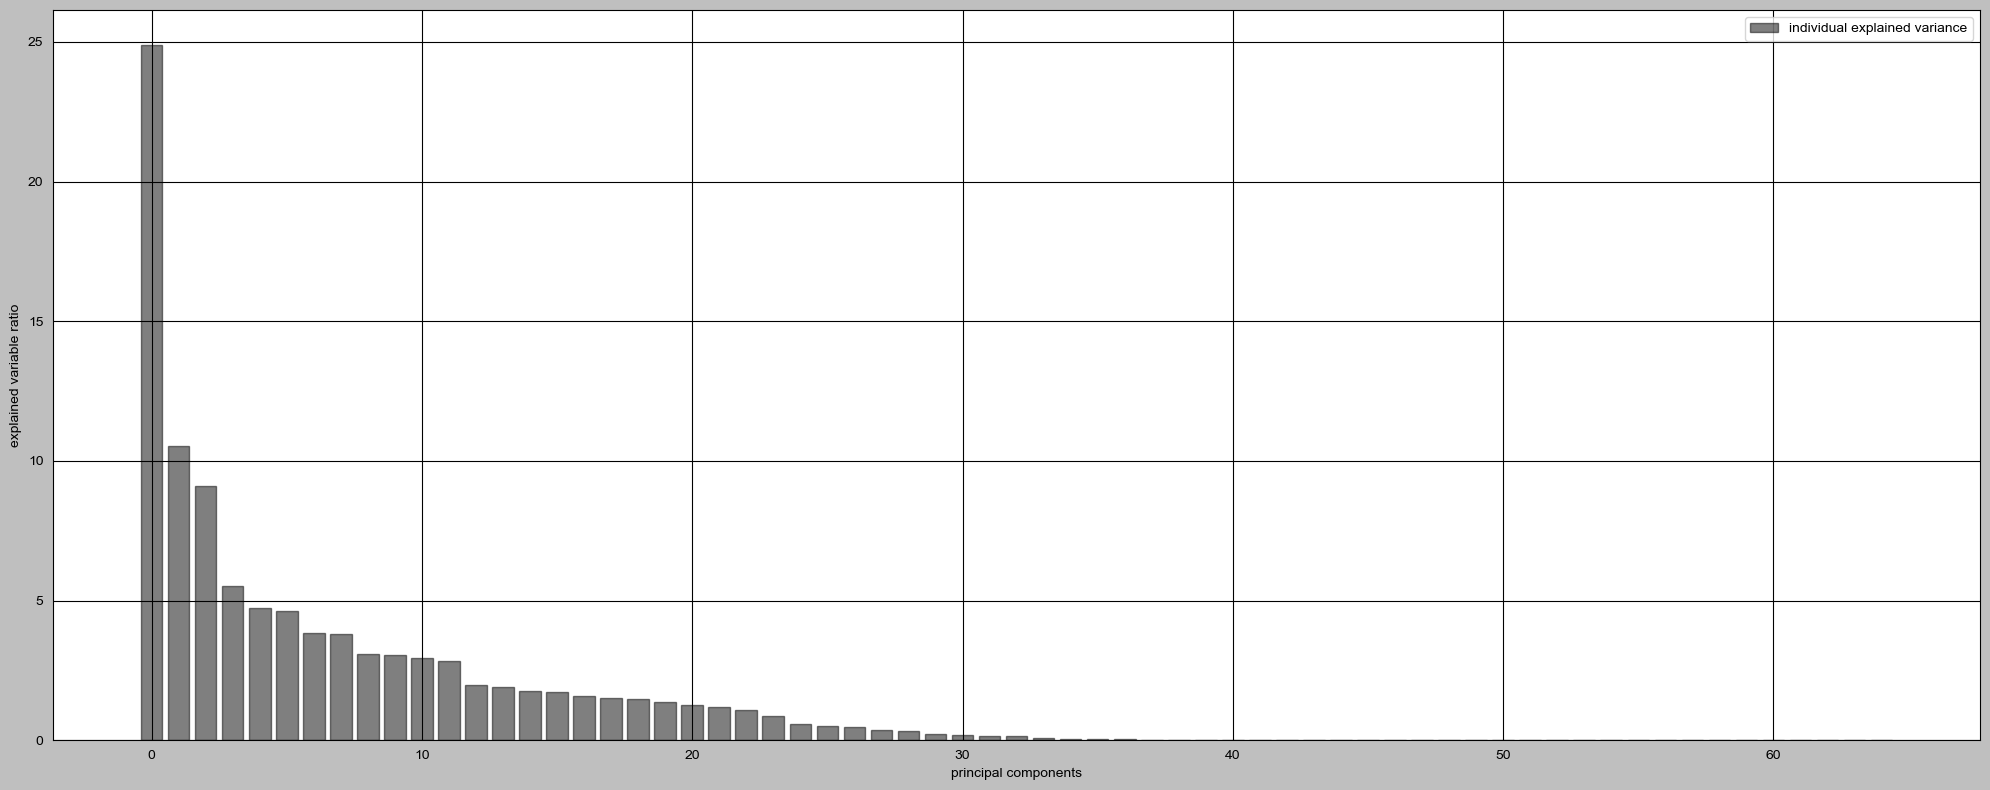

In [45]:
imgPath = "C:\\Users\\Malware\\DataspellProjects\\Thesis-on-DDOS\\images\\"
imgName = "PCA_explained_variance.png"
with plt.style.context(style="grayscale"):
    plt.figure(figsize=(20,8))
    plt.bar(x=range(len(X.columns)),height=exp_var,alpha=0.5,align="center",label="individual explained variance")
    plt.legend(loc="best")
    plt.xlabel("principal components")
    plt.ylabel("explained variable ratio")
    plt.tight_layout()
    plt.savefig(imgPath+imgName)

##### Camulative Explained Variance

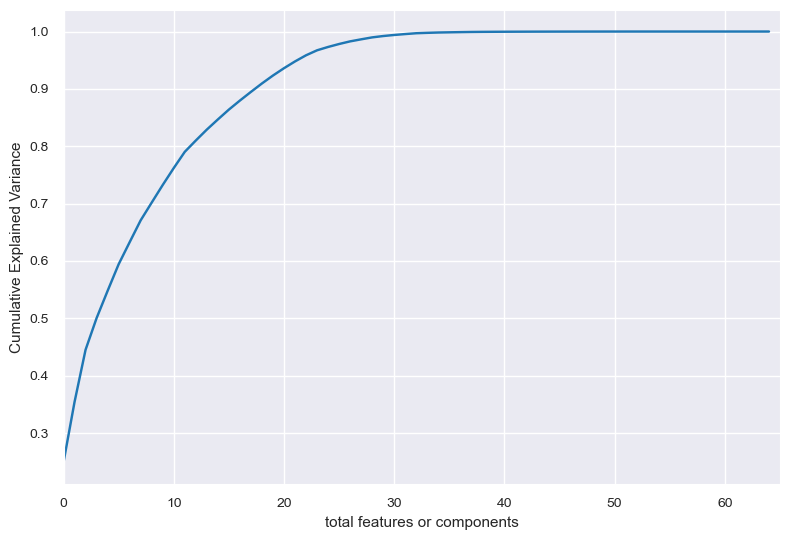

In [43]:
imgPath = "C:\\Users\\Malware\\DataspellProjects\\Thesis-on-DDOS\\images\\"
imgName = "PCA_Cumulative_explained_variance.png"
pca = PCA().fit(X_std)
with plt.style.context(style="seaborn-notebook"):
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel("total features or components")
    plt.ylabel("Cumulative Explained Variance")
    plt.xlim(0,len(X.columns),1)
    plt.tight_layout()
    plt.savefig(imgPath+imgName)

In [45]:
model = PCA(n_components=0.99999).fit(X_std)
X_pc = model.transform(X_std)

# number of components
n_pcs= model.components_.shape[0]
# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = list(X.columns)
# get the names
most_important_names = list(set(initial_feature_names[most_important[i]] for i in range(n_pcs)))
print(n_pcs, len(most_important_names))

53 42


# LIST COMPREHENSION HERE AGAIN
length = len(most_important_names)
dic = {'PC-{}'.format(i): most_important_names[i] for i in range(length)}

# build the dataframe
principal_components_df = pd.DataFrame(dic.items(),columns=['Principal Components','Features'])
principal_components_df

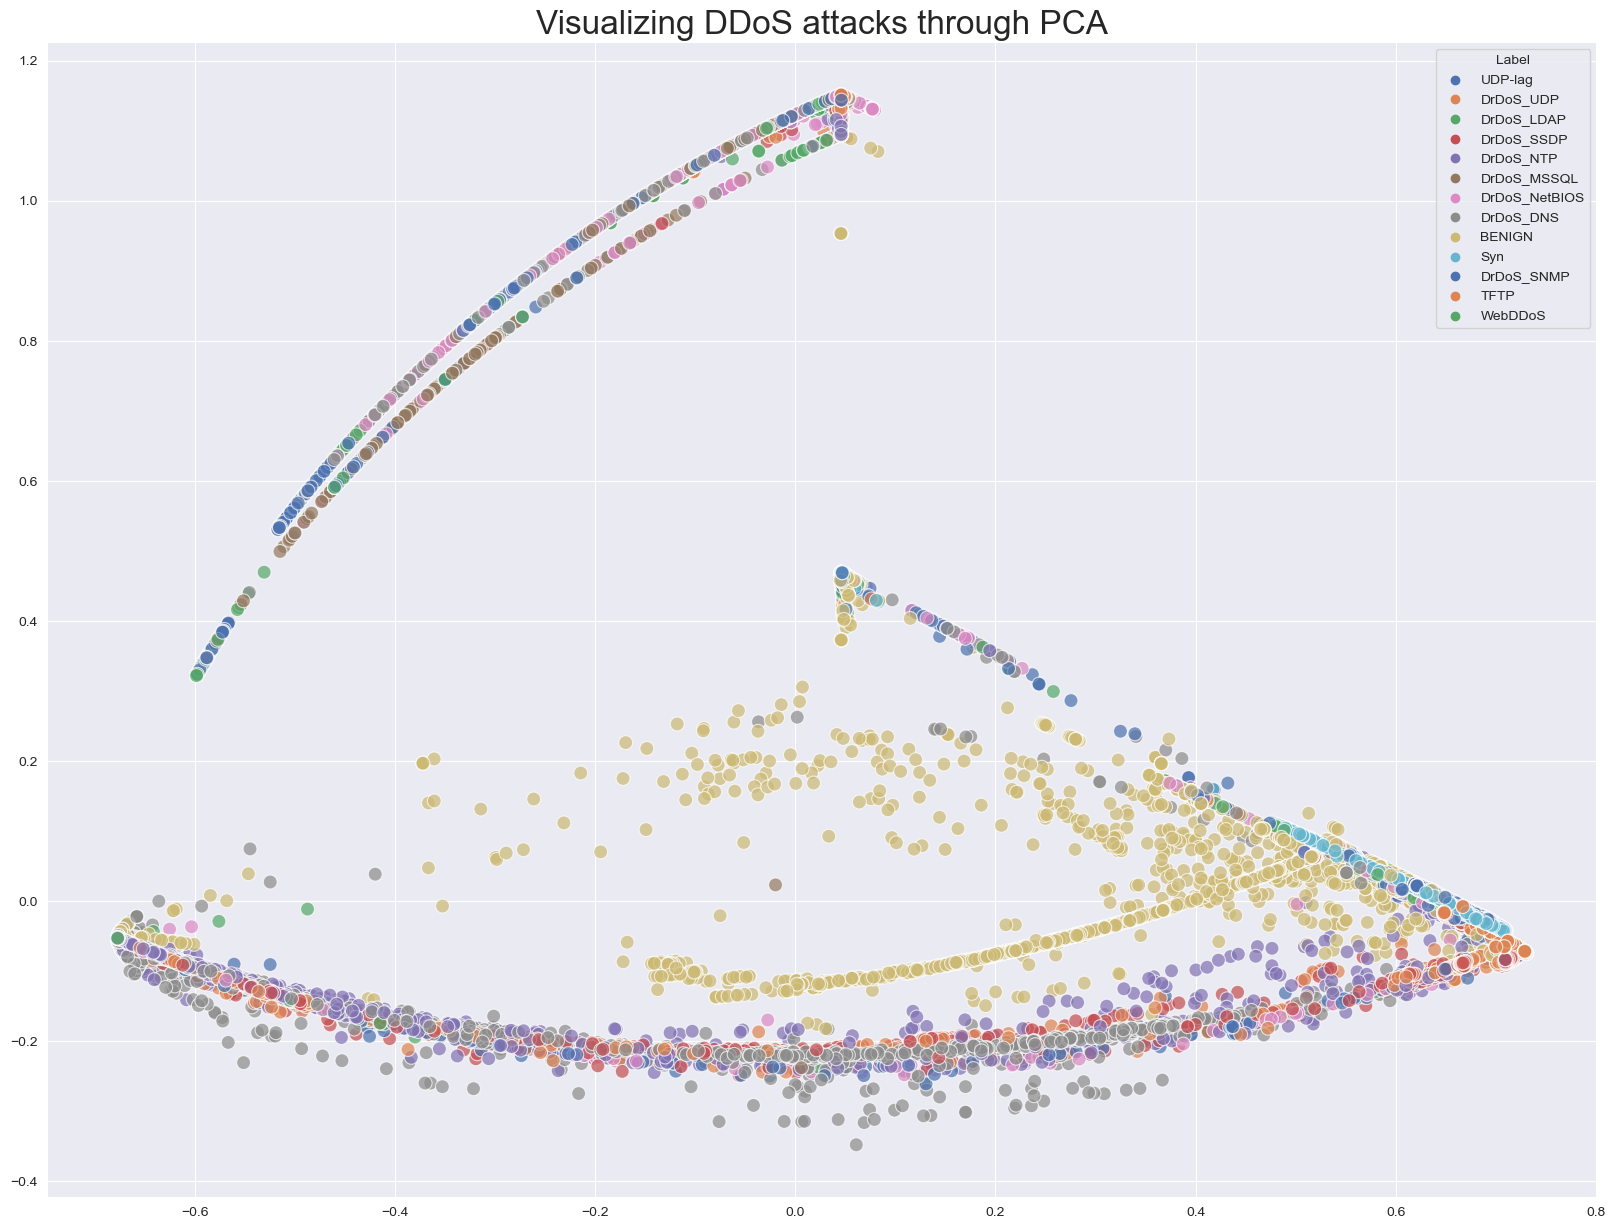

In [52]:
imgPath = "C:\\Users\\Malware\\DataspellProjects\\Thesis-on-DDOS\\images\\"
imgName = "Visualizing_DDoS_using_PCA.png"
pca = PCA(n_components=0.99999)
principalComponents = pca.fit_transform(X_norm)
plt.figure(figsize=(10,10))
sns.scatterplot(x=principalComponents[:, 0], y=principalComponents[:, 1], s= 100, hue=before_encoding_dataframe['Label'], cmap='Spectral',alpha=0.7,sizes=(20, 200), legend="full",palette="deep")
plt.title('Visualizing DDoS attacks through PCA', fontsize=24)
plt.savefig(imgPath+imgName)

In [54]:
from sklearn.manifold import TSNE

imgPath = "C:\\Users\\Malware\\DataspellProjects\\Thesis-on-DDOS\\images\\"
imgName = "Visualizing_DDoS_using_PCA_tSNE.png"
tsne_ = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=600).fit_transform(principalComponents)
plt.figure(figsize=(10,10))
sns.scatterplot(x=tsne_[:, 0], y=tsne_[:, 1], s= 100, hue=before_encoding_dataframe['Label'], cmap='Spectral',alpha=0.7,sizes=(20, 200), legend="full",palette="deep")
plt.title('Visualizing DDoS attacks through t-SNE', fontsize=24);

KeyboardInterrupt: 

In [71]:
plt.style.available


['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']